# LIBRA and the Lithium-Lead Liquid Immersion Blanket
## 1L BABY

In [26]:
import math
import openmc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, ListedColormap
from openmc_model_PbLi import baby_model

### Geometry

In [27]:
model = baby_model()
geometry = model.geometry

isotopes ['Ag107', 'Ag109', 'Al27', 'Ar36', 'Ar38', 'Ar40', 'As75', 'B10', 'B11', 'Be9', 'Bi209', 'C12', 'C13', 'Ca40', 'Ca42', 'Ca43', 'Ca44', 'Ca46', 'Ca48', 'Cd106', 'Cd108', 'Cd110', 'Cd111', 'Cd112', 'Cd113', 'Cd114', 'Cd116', 'Co59', 'Cr50', 'Cr52', 'Cr53', 'Cr54', 'Cu63', 'Cu65', 'F19', 'Fe54', 'Fe56', 'Fe57', 'Fe58', 'H1', 'H2', 'He3', 'He4', 'K39', 'K40', 'K41', 'Li6', 'Li7', 'Mg24', 'Mg25', 'Mg26', 'Mn55', 'Mo100', 'Mo92', 'Mo94', 'Mo95', 'Mo96', 'Mo97', 'Mo98', 'N14', 'N15', 'Na23', 'Nb93', 'Ni58', 'Ni60', 'Ni61', 'Ni62', 'Ni64', 'O16', 'O17', 'O18', 'P31', 'Pb204', 'Pb206', 'Pb207', 'Pb208', 'S32', 'S33', 'S34', 'S36', 'Sb121', 'Sb123', 'Si28', 'Si29', 'Si30', 'Sn112', 'Sn114', 'Sn115', 'Sn116', 'Sn117', 'Sn118', 'Sn119', 'Sn120', 'Sn122', 'Sn124', 'Ti46', 'Ti47', 'Ti48', 'Ti49', 'Ti50', 'Tl203', 'Tl205', 'W182', 'W183', 'W184', 'W186', 'Zn64', 'Zn66', 'Zn67', 'Zn68', 'Zn70', 'Zr90', 'Zr91', 'Zr92', 'Zr94', 'Zr96']
Searching libraries with the following priority {'ENDFB-8.0

### Vault Geometry

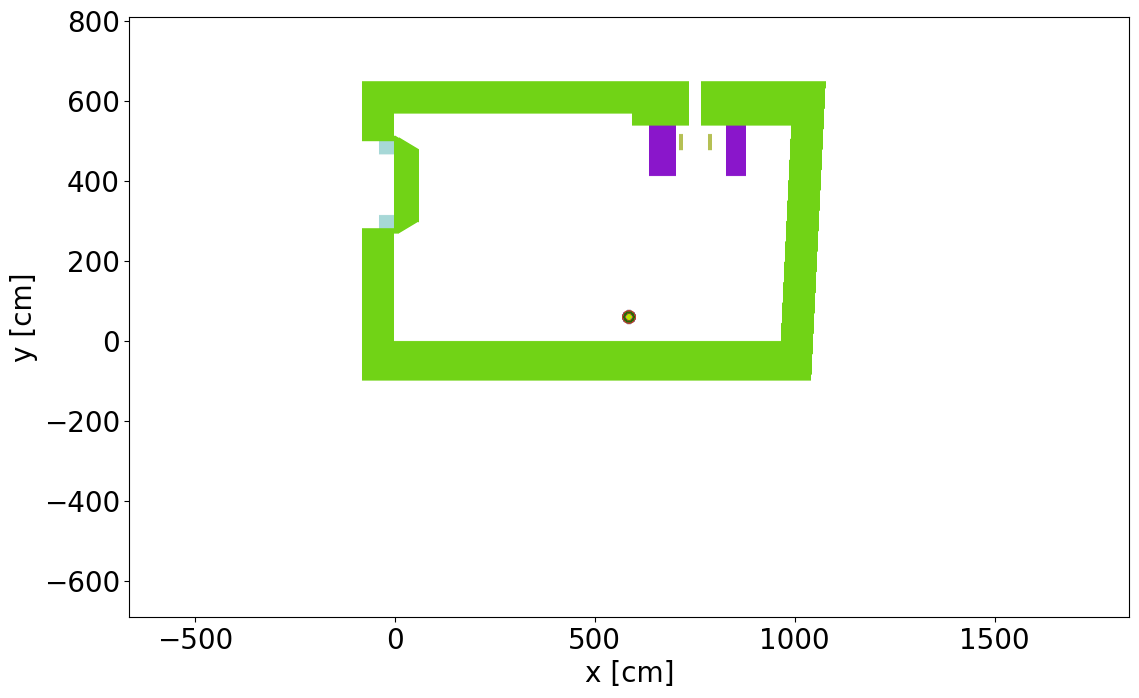

In [28]:
# Visualization

from libra_toolbox.neutronics.vault import Air
from openmc_model_PbLi import air

x_c = 587
y_c = 60
z_c = 100
ax = geometry.plot(
    width=(2500, 1500),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xy",
    color_by="material",
    colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

### BABY 1L Geometry XZ View

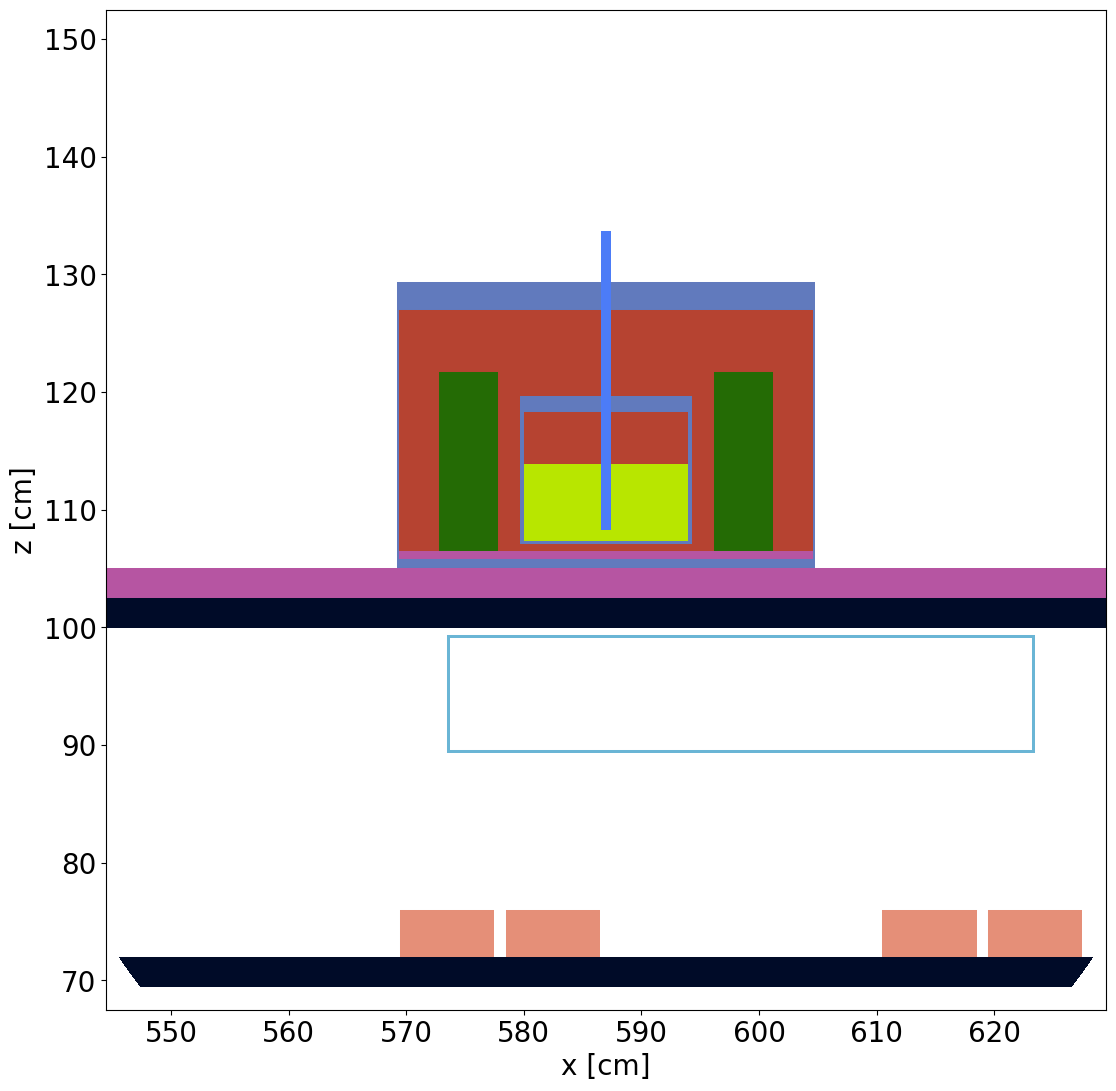

In [29]:
ax = geometry.plot(
    width=(85, 85),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xz",
    color_by="material",
    colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

### BABY 1L Geometry YZ View

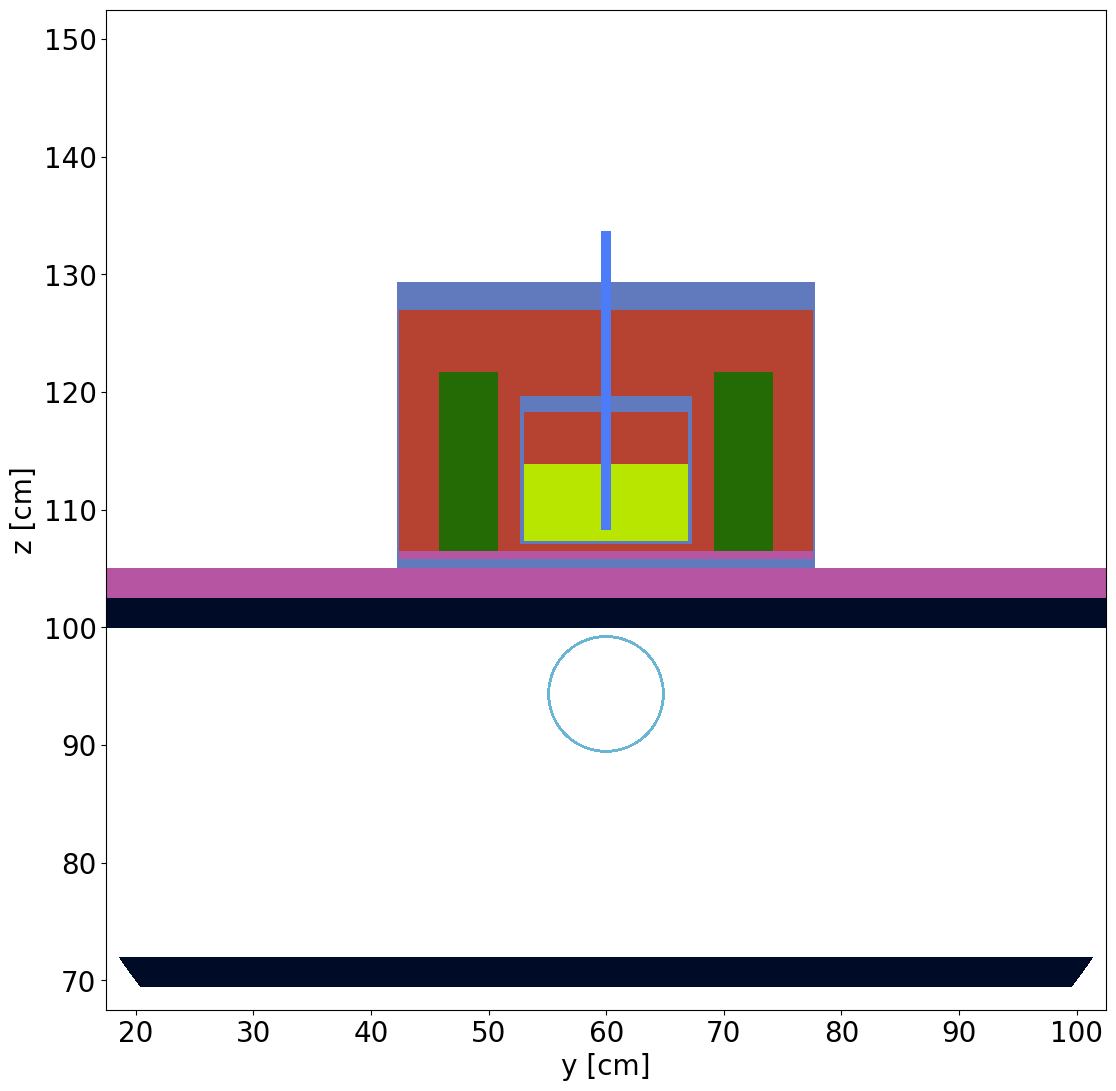

In [30]:
ax = geometry.plot(
    width=(85, 85),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="yz",
    color_by="material",
    colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

### BABY 1L Geometry XY View

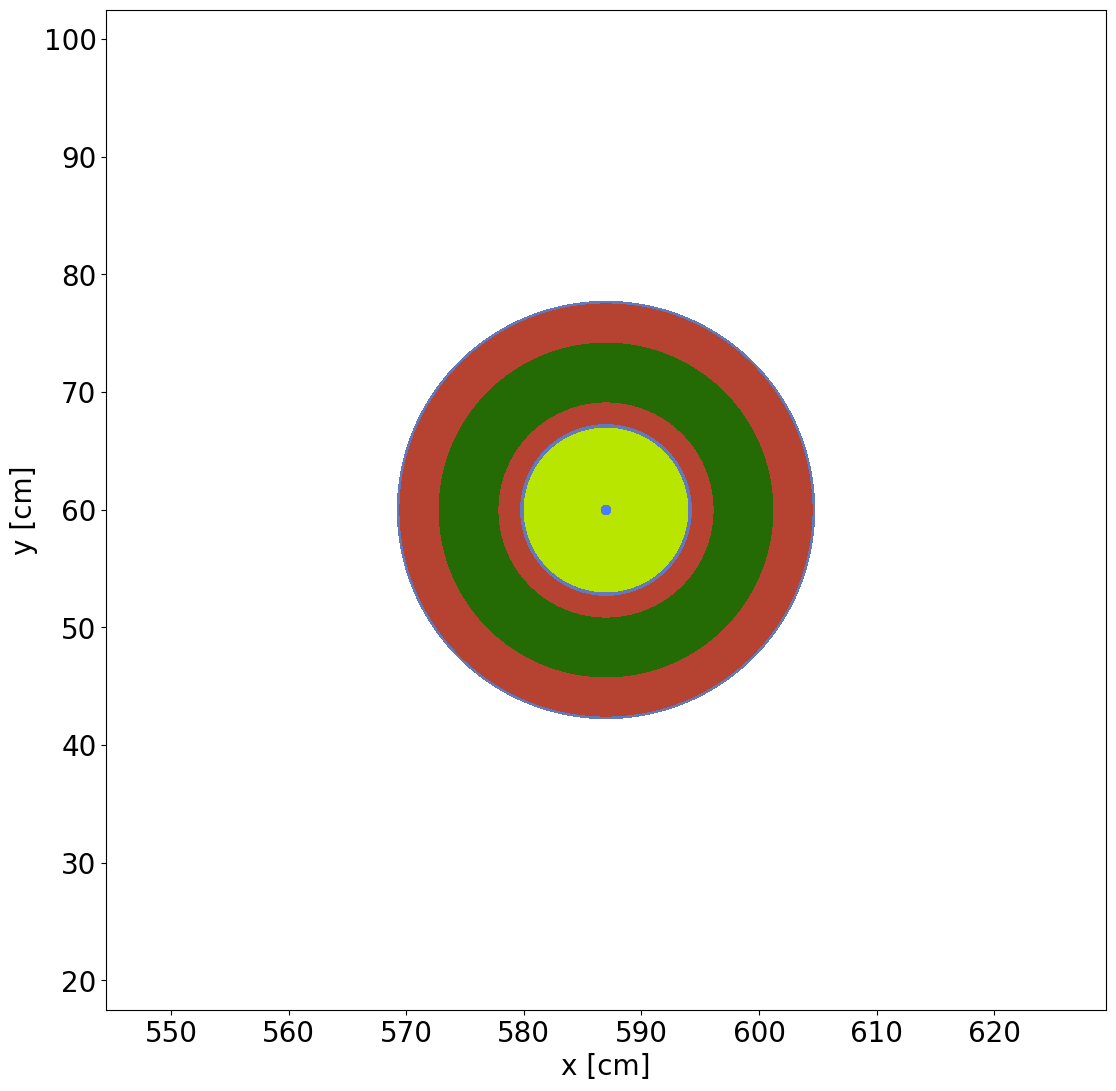

In [31]:
ax = geometry.plot(
    width=(85, 85),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xy",
    color_by="material",
    colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()


### Spatial Distribution Results

<class 'openmc.mesh.CylindricalMesh'>
Mesh tally data exported to tally_mesh_data_PbLi.vtk


/root/miniconda3/envs/BABY_1l_LiPb_PipFix/lib/python3.12/site-packages/openmc/mesh.py:1877: UserWarning: Cartesian coordinates are returned from this property as of version 0.14.0
  warnings.warn('Cartesian coordinates are returned from this property as of version 0.14.0')
/tmp/ipykernel_8092/2379055524.py:61: RuntimeWarning: invalid value encountered in divide
  rel_std_dev_array = stdev_array_combined / mean_array_summed


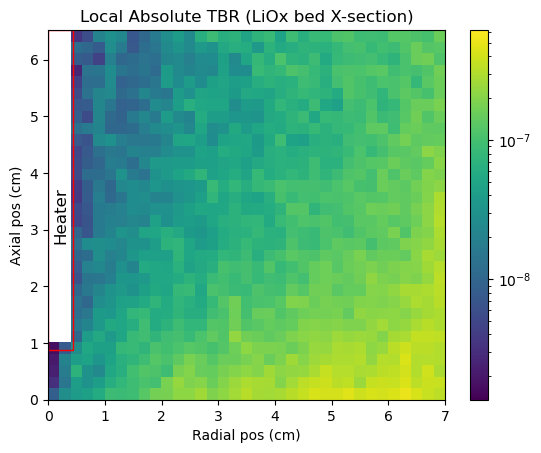

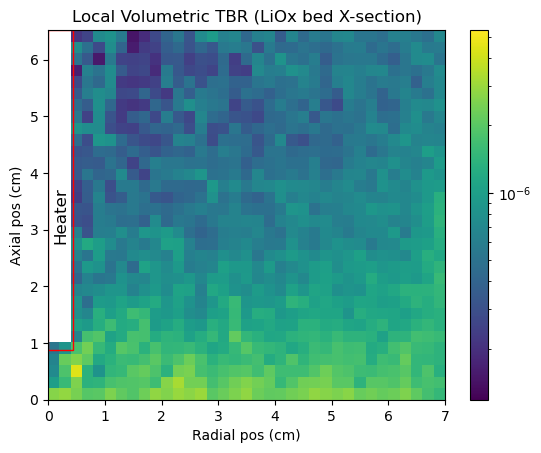

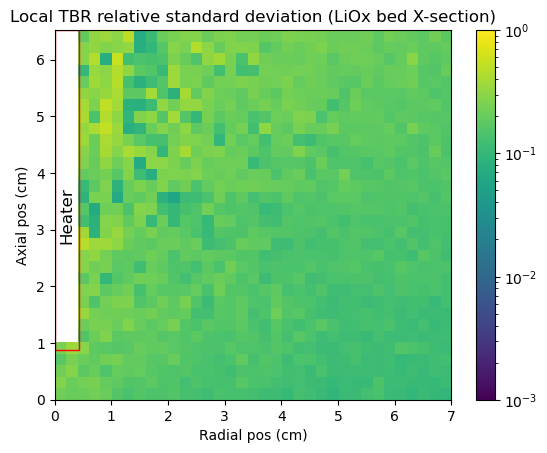

In [32]:
from openmc_model_PbLi import PbLi_radius, PbLi_thickness, heater_gap, heater_radius
import matplotlib.colors as mcolors
import matplotlib.patches as patches

# Load the statepoint file
sp = openmc.StatePoint("statepoint.100.h5")
# Get the tally object from the statepoint file
tally_mesh = sp.get_tally(name="TBR_mesh")

# Get pandas dataframe for the cell tally data
df = tally_mesh.get_pandas_dataframe()

# Get the mesh object from the tally filters
mesh = None
for f in tally_mesh.filters:
    if isinstance(f, openmc.MeshFilter):
        mesh = f.mesh
        print(type(mesh))
        break

if mesh is None:
    raise ValueError("No mesh filter found in the tally!")

if mesh is not None:
    # Extract the number of bins for each dimension from the mesh
    n_r = len(mesh.r_grid) - 1  # Radial bins
    n_phi = len(mesh.phi_grid) - 1  # Angular binss
    n_z = len(mesh.z_grid) - 1  # Axial bins

    # Convert mean TBR values to NumPy array
    mean_array = df['mean'].values.reshape((n_z, n_phi, n_r))

    # Convert std dev values to NumPy array
    stdev_array = df['std. dev.'].values.reshape((n_z, n_phi, n_r))

    ### Export vtk of mesh results ###
    datasets = {
    "mean_vol_TBR": mean_array,
    }
    mesh.write_data_to_vtk("tally_mesh_data_PbLi.vtk", datasets, volume_normalization=True) # True = use built-in data normalisation

    print("Mesh tally data exported to tally_mesh_data_PbLi.vtk")

    # Reshape the mean and standard deviation arrays to 2D for plotting by collapsing angular bins
    # Combine the standard deviation over angular bins when collapsing the angular dimension
    stdev_array_combined = np.sqrt(np.sum(stdev_array**2, axis=1))

    # Get the cell volumes from the mesh object
    mesh_volumes = mesh.volumes
    # Sum all angular bins for each r and z bin
    mean_array_summed = np.sum(mean_array, axis=1)
    volume_array_summed = np.sum(mesh_volumes, axis=1)

    # Reshape cell volumes to match the shape of the tally data
    volume_array_summed = np.squeeze(volume_array_summed).transpose()

    # Calculate normalised TBR by dividing mean TBR by cell volumes
    vol_tbr_array = mean_array_summed / volume_array_summed

    # Divide the standard deviation values by the mean values to get the relative standard deviation for plotting below
    rel_std_dev_array = stdev_array_combined / mean_array_summed

    #### Plot local TBR values ####

    fig, ax = plt.subplots()
 
    im = ax.imshow(
        mean_array_summed,
        interpolation='nearest',
        extent=[0, PbLi_radius, 0, PbLi_thickness],
        origin='lower',
        aspect='auto',
        norm=mcolors.LogNorm(vmin=(np.min(mean_array_summed[mean_array_summed > 0])*0.8), vmax=(np.max(mean_array_summed))*1.2),  # Use LogNorm for logarithmic scale
        cmap='viridis'  # You can change the colormap if desired
    )
    plt.colorbar(im, ax=ax)
    ax.set_title('Local Absolute TBR (LiOx bed X-section)')
    ax.set_xlabel('Radial pos (cm)')
    ax.set_ylabel('Axial pos (cm)')


    # Add a rectangle outlining the heater region
    heater_rect = patches.Rectangle(
        (0, heater_gap),  # (x, y) lower left corner
        heater_radius,  # width
        (PbLi_thickness-heater_gap),  # height
        linewidth=1,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(heater_rect)

    # Add a label
    ax.text(
        heater_radius/2, PbLi_thickness/2,  # position in the center of the rectangle
        'Heater',
        color='black',
        fontsize=12,
        ha='center',
        va='center',
        rotation=90
    )
    plt.show()

    #### Plot local volumetric TBR ####
    
    fig, ax = plt.subplots()
 
    im = ax.imshow(
        vol_tbr_array,
        interpolation='nearest',
        extent=[0, PbLi_radius, 0, PbLi_thickness],
        origin='lower',
        aspect='auto',
        norm=mcolors.LogNorm(vmin=(np.min(vol_tbr_array[vol_tbr_array > 0]))*0.8, vmax=(np.max(vol_tbr_array))*1.2),  # Use LogNorm for logarithmic scale
        cmap='viridis'  # You can change the colormap if desired
    )
    plt.colorbar(im, ax=ax)
    ax.set_title('Local Volumetric TBR (LiOx bed X-section)')
    ax.set_xlabel('Radial pos (cm)')
    ax.set_ylabel('Axial pos (cm)')


    # Add a rectangle outlining the heater region
    heater_rect = patches.Rectangle(
        (0, heater_gap),  # (x, y) lower left corner
        heater_radius,  # width
        (PbLi_thickness-heater_gap),  # height
        linewidth=1,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(heater_rect)

    # Add a label
    ax.text(
        heater_radius/2, PbLi_thickness/2,  # position in the center of the rectangle
        'Heater',
        color='black',
        fontsize=12,
        ha='center',
        va='center',
        rotation=90
    )
    plt.show()

    #### Plot local TBR relative standard deviation values ####

    fig, ax = plt.subplots()

    im = ax.imshow(
       rel_std_dev_array,
       interpolation='nearest',
       extent=[0, PbLi_radius, 0, PbLi_thickness],
       origin='lower',
       aspect='auto',
       norm=mcolors.LogNorm(vmin=1e-3, vmax=1),  # Use LogNorm for logarithmic scale
       cmap='viridis'
       )
    
    plt.colorbar(im, ax=ax)
    ax.set_title('Local TBR relative standard deviation (LiOx bed X-section)')
    ax.set_xlabel('Radial pos (cm)')
    ax.set_ylabel('Axial pos (cm)')

    # Add a rectangle outlining the heater region
    heater_rect = patches.Rectangle(
        (0, heater_gap),  # (x, y) lower left corner
        heater_radius,  # width
        (PbLi_thickness-heater_gap),  # height
        linewidth=1,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(heater_rect)

    # Add a label
    ax.text(
        heater_radius/2, PbLi_thickness/2,  # position in the center of the rectangle
        'Heater',
        color='black',
        fontsize=12,
        ha='center',
        va='center',
        rotation=90
    )
    plt.show()

### Global Result

In [33]:
sp = openmc.StatePoint("statepoint.100.h5")
tbr_withvault = sp.get_tally(name="TBR").get_pandas_dataframe()
print(f"TBR: {tbr_withvault['mean'].iloc[0] :.6e}\n")
print(f"TBR std. dev.: {tbr_withvault['std. dev.'].iloc[0] :.6e}\n")

TBR: 1.017200e-03

TBR std. dev.: 8.804323e-06

